#### File Name: Shruti Gupta - Assignment Simple Linear Regression 1 - Week 12
#### Author: Shruti Gupta
#### Date: 25/05/2019

# Ordinary Least Squares in Python



## Statsmodels

Statsmodel is a Python library designed for more statistically-oriented approaches to data analysis, with an emphasis on econometric analyses. It integrates well with the [pandas](http://pandas.pydata.org) and [numpy](http://numpy.org) libraries we covered in a previous post. It also has built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. [Scikit-learn](http://scikit-learn.org/stable/) also has support for linear regression, including many forms of regularized regression lacking in statsmodels, but it lacks the rich set of statistical tests and diagnostics that have been developed for linear models.

## Linear Regression and Ordinary Least Squares

Linear regression one of the simplest and most commonly used modeling techniques. It makes very strong assumptions about the relationship between the predictor variables (the X) and the response (the Y). It assumes that this relationship takes the form:

$y = \beta_0 + \beta_1 * x$

Ordinary Least Squares is the simplest and most common estimator in which the two $\beta$s are chosen to minimize the square of the distance between the predicted values and the actual values. Even though this model is quite rigid and often does not reflect the true relationship, this still remains a popular approach for several reasons. For one, it is computationally cheap to calculate the coefficients. It is also easier to interpret than more sophisticated models, and in situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * x$

Here the hats on the variables represent the fact that they are estimated from the data we have available. The $\beta$s are termed the parameters of the model or the coefficients. $\beta_0$ is called the constant term or the intercept.

#### Ordinary Least Squares Using Statsmodels

The statsmodels package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module. 

To start with we load the [Longley dataset](http://stat.ethz.ch/R-manual/R-patched/library/datasets/html/longley.html) of US macroeconomic data from the [Rdatasets](http://vincentarelbundock.github.io/Rdatasets/) website.

In [1]:
#loading of various libraries

# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# load statsmodels as alias ``sm``
import statsmodels.api as sm

# load the longley dataset into a pandas data frame - first column (year) used as row labels
datas=sm.datasets.get_rdataset("longley").data #data retrieved using get_rdataset it stored as a data frame
datas.head() #checking whether data has loaded properly

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [2]:
datas.isnull().any() #checking for any null values

GNP.deflator    False
GNP             False
Unemployed      False
Armed.Forces    False
Population      False
Year            False
Employed        False
dtype: bool

We will use the variable Total Derived Employment (``'Employed'``) as our response ``y`` and Gross National Product (``'GNP'``) as our predictor ``X``. 

1. Create a linear regression model that can predict Employment based on GNP as independent variable

In [3]:
#setting the response and predictor values

y = datas.Employed  # response

X = datas.GNP  # predictor
X = sm.add_constant(X)  # Addsing a constant term to the predictor
X.head()

,const,GNP
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


2. Using statsmodel OLS method create a model trained on GNP

In [4]:
#applying OLS on the response and predictor
test =sm.OLS(y,X)

3. Fit the model by calling the OLS object's ``fit()`` method. 

In [5]:
#using fit() method to get the required data
results = test.fit()
results.summary() #displaying a summary from calling of fit() method

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 30 May 2019   Prob (F-statistic):           8.36e-12
Time:                        17:43:23   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. Print the slope of GNP predictor and the intercept variables

In [6]:
results.params #printing the slope of GNP predictor and intercept

const    51.843590
GNP       0.034752
dtype: float64

5. Pick 100 hundred points equally spaced from the min to the max of GNP 
6. Calculate the predicted values and plot the graph between X and Y

Text(0.5, 1.0, 'Total Employment againts GNP')

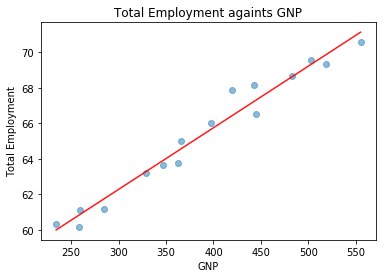

In [8]:
# 100 hundred points equally spaced from the min to the max
import matplotlib.pyplot as plt
%matplotlib inline
X_points = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_points = sm.add_constant(X_points) # add constant

# Now we calculate the predicted values
ypred = results.predict(X_points)

#plotting of data and line of regression
plt.scatter(X.GNP, y, alpha=0.5) # Plotting the raw data
plt.xlabel("GNP")
plt.ylabel("Total Employment")
plt.plot(X_points[:, 1], ypred, 'r', alpha=0.9) # Adding the regression line
plt.title('Total Employment againts GNP')

Statsmodels also provides a formulaic interface . Note that this requires the use of a different api to statsmodels, and the class is now called ``ols`` rather than ``OLS``. The argument ``formula`` allows you to specify the response and the predictors using the column names of the input data frame ``data``. 

7. Task : import formula api as alias smf and then create OLS based model using the formula Employed ~ GNP

    Hint: smf.ols(formula='Employed ~ GNP', data=df).fit()
    

8. Also print a summary of the object created in the previous step 



In [9]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
models = smf.ols(formula='Employed ~ GNP', data=datas).fit()
models.summary()

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 30 May 2019   Prob (F-statistic):           8.36e-12
Time:                        17:44:35   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As a final note, if you don't want to include a constant term in your model, you can exclude it using the minus operator.

9. Task : Create model with Zero intercept and plot X-Y predicted/Y-original values on a graph


10. Task: Create model with non-Zero intercept and plot X-Y predicted/Y-original values on a graph

In [10]:
# using the fit method to get the no-intercept model
model_1 = smf.ols(formula='Employed ~ GNP - 1', data=datas).fit() #checking for without intercept

# 100 hundred points equally spaced from the min to the max
X_new = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_new = sm.add_constant(X_new) # add constant as we did before

#predicting 
ypred_int = models.predict(X_new) #predicting using intercept model
ypred_noint = model_1.predict(X_new) #predicting using without intercept model



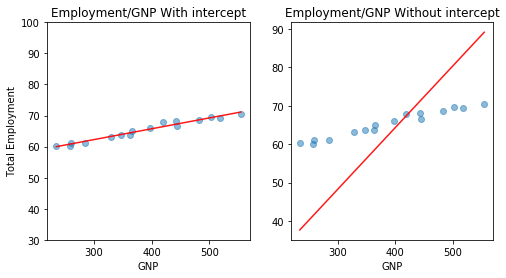

In [11]:
#graphs
fig = plt.figure(figsize=(8,4))

#plot code for with intercept
g_pos = plt.subplot(121)
g_pos.scatter(X.GNP, y, alpha=0.5) # Plotting the raw data
plt.ylim(30, 100) # Setting of y-axis to be same for both graphs
plt.xlabel("GNP")
plt.ylabel("Total Employment")
plt.title("Employment/GNP With intercept")
g_pos.plot(X_points[:, 1], ypred_int, 'r', alpha=0.9) # Adding the regression line

#plot code for without intercept
g_pos_1 = plt.subplot(122)
g_pos_1.scatter(X.GNP, y, alpha=0.5) # Plotting the raw data
plt.xlabel("GNP")
plt.title("Employment/GNP Without intercept")
g_pos_1.plot(X_points[:, 1], ypred_noint, 'r', alpha=0.9) # Adding the regression line